<a href="https://colab.research.google.com/github/SonakshiA/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, datasets, layers

**Downloading the dataset from https://keras.io/api/datasets/fashion_mnist/**

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Showing first 9 training images**

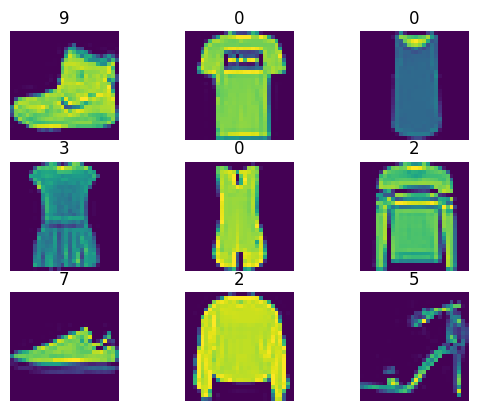

In [5]:
for i in range (9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis("off")

**On-Hot Encoding the labels**

In [6]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


**Bringing pixel values between 0 and 1**

In [15]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
xtrain = x_train.astype('float32')
xtest = x_test.astype('float32')
xtrain/=255.0
xtest/=255.0

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Neural Network Implementation**

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu')) #Dense(128) is a fully connected layer
model.add(layers.Dense(10,activation='softmax'))

In [30]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [32]:
model.fit(xtrain,y_train,epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2754 - accuracy: 0.8968
Epoch 2/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2759 - accuracy: 0.8959
Epoch 3/20
1875/1875 [==============================] - 148s 79ms/step - loss: 0.2685 - accuracy: 0.8994
Epoch 4/20
1875/1875 [==============================] - 148s 79ms/step - loss: 0.2636 - accuracy: 0.8993
Epoch 5/20
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2625 - accuracy: 0.8994
Epoch 6/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2557 - accuracy: 0.9030
Epoch 7/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2547 - accuracy: 0.9033
Epoch 8/20
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2506 - accuracy: 0.9048
Epoch 9/20
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2469 - accuracy: 0.9054
Epoch 10/20
1875/1875 [==============================] 

**Accuracies**

In [33]:
trainScore = model.evaluate(xtrain,y_train)
print("Training accuracy: ", trainScore[1])
testScore = model.evaluate(xtest,y_test)
print("Test accuracy: ", testScore[1])

1875/1875 [==============================] - 34s 18ms/step - loss: 0.1577 - accuracy: 0.9387
Training accuracy:  0.9386500120162964
313/313 [==============================] - 5s 16ms/step - loss: 0.2584 - accuracy: 0.9082
Test accuracy:  0.9082000255584717


**Predictions**

In [34]:
predictions = model.predict(xtest)

313/313 [==============================] - 5s 16ms/step


In [36]:
results = np.argmax(predictions,axis=1)
print(results)

[9 2 1 ... 8 1 5]


In [37]:
labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

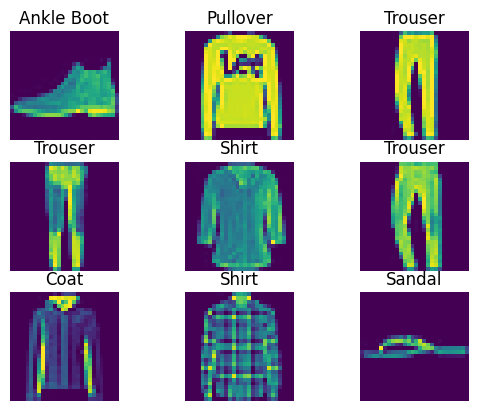

In [42]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(xtest[i])
  plt.title(labels[results[i]])
  plt.axis('off')